<a href="https://colab.research.google.com/github/KushiBK/KushiBK/blob/main/Blinkit_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Case Study 1: Data Quality & Standardization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Case Study 1: Data Quality & Standardization

In [ ]:
df1 = pd.read_excel('/content/blinkit.xlsx')
df1

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df1['Item Fat Content'] = df1['Item Fat Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})
df1['Item Fat Content']

,Item Fat Content
0,Regular
1,Low Fat
2,Regular
3,Regular
4,Low Fat
...,...
8518,Low Fat
8519,Low Fat
8520,Low Fat
8521,Regular


In [ ]:
cat_cols = ['Item Fat Content','Item Type','Outlet Location Type','Outlet Size','Outlet Type']
df1[cat_cols] = df1[cat_cols].astype('category')
print(df1.dtypes)

Item Fat Content             category
Item Identifier                object
Item Type                    category
Outlet Establishment Year       int64
Outlet Identifier              object
Outlet Location Type         category
Outlet Size                  category
Outlet Type                  category
Item Visibility               float64
Item Weight                   float64
Sales                         float64
Rating                        float64
dtype: object


Case Study 2: Handling Missing Values with Advanced Imputation

In [ ]:
df1['Item Weight'] = df1.groupby('Item Type')['Item Weight'].transform(lambda x:x.fillna(x.median()))
print(df1['Item Weight'].isnull().sum())

0


/tmp/ipython-input-3186720729.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1['Item Weight'] = df1.groupby('Item Type')['Item Weight'].transform(lambda x:x.fillna(x.median()))


Case Study 3: Exploratory Data Analysis (EDA) – Numerical Features

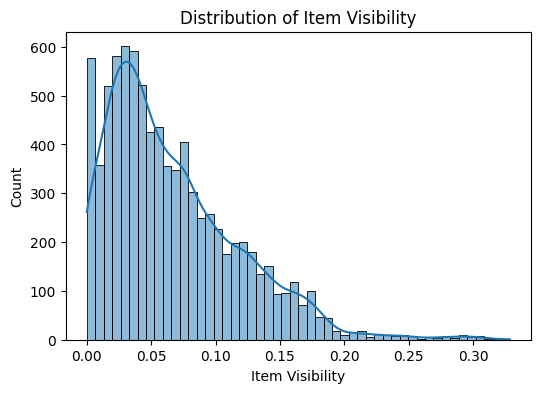

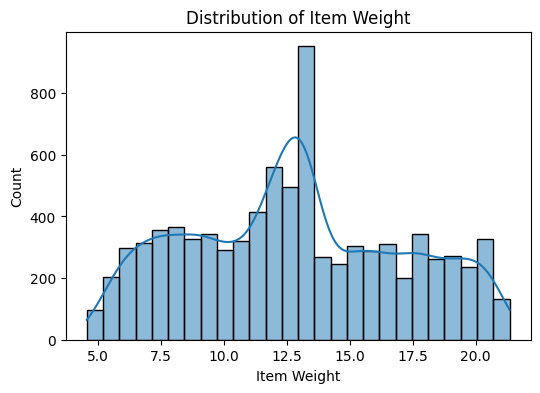

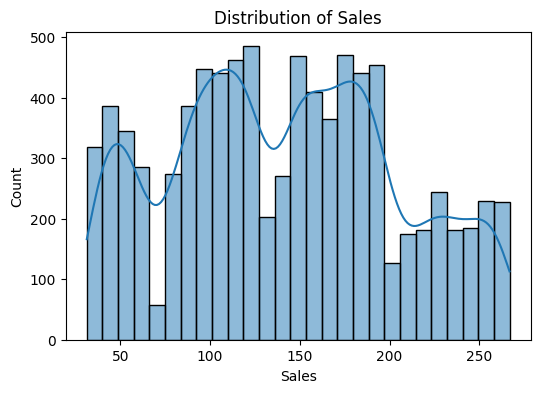

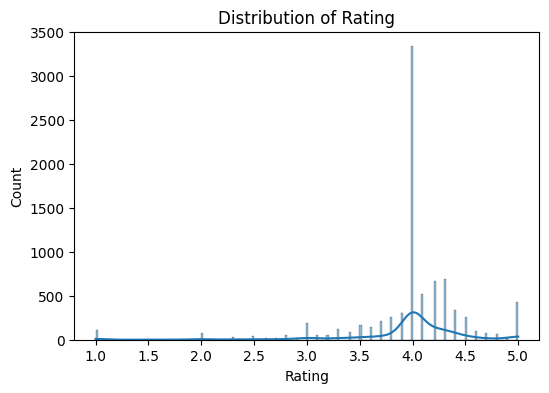

In [ ]:
num_cols = ['Item Visibility','Item Weight','Sales','Rating']
for col in num_cols:
  plt.figure(figsize=(6,4))
  sns.histplot(df1[col], kde=True)
  plt.title(f"Distribution of {col}")
  plt.show()

Case Study 4: Categorical Feature Analysis

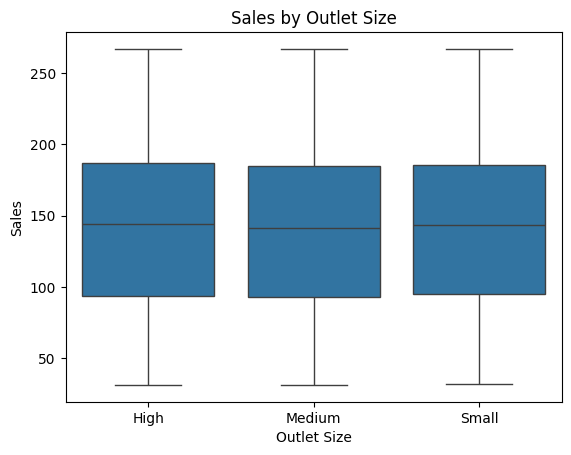

In [ ]:
sns.boxplot(x='Outlet Size', y='Sales', data=df1)
plt.title("Sales by Outlet Size")
plt.title("Sales by Outlet Size")
plt.show()

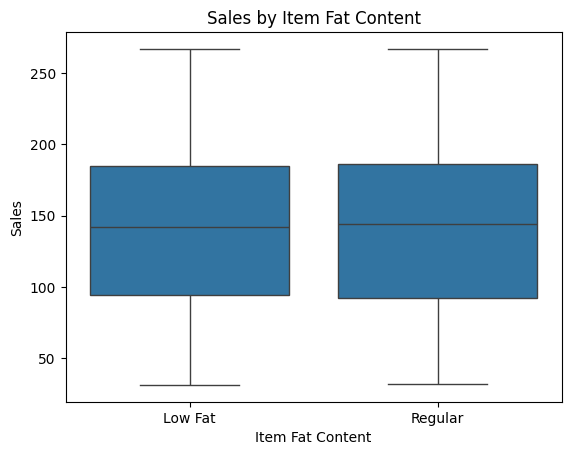

In [ ]:
sns.boxplot(x='Item Fat Content', y='Sales', data=df1)
plt.title("Sales by Item Fat Content")
plt.show()

Case Study 5: Time-Based Analysis – Outlet Age

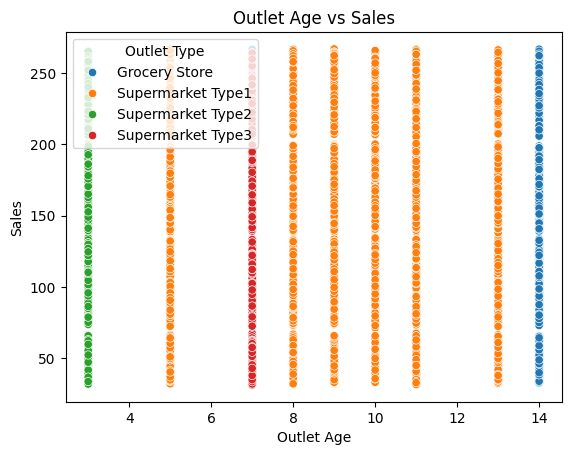

In [ ]:
df1['Outlet Age'] = 2025 - df1['Outlet Establishment Year']
sns.scatterplot(x='Outlet Age', y='Sales', hue='Outlet Type', data=df1)
plt.title("Outlet Age vs Sales")
plt.show()

Case Study 6: Feature Engineering – Derived Features

In [ ]:
df1['Visibility_Sales'] = df1['Item Visibility'] * df1['Sales']
df1['Visibility_Sales']

,Visibility_Sales
0,14.549824
1,0.991548
2,4.273464
3,5.348345
4,1.873844
...,...
8518,0.000000
8519,8.387797
8520,2.388189
8521,10.542611


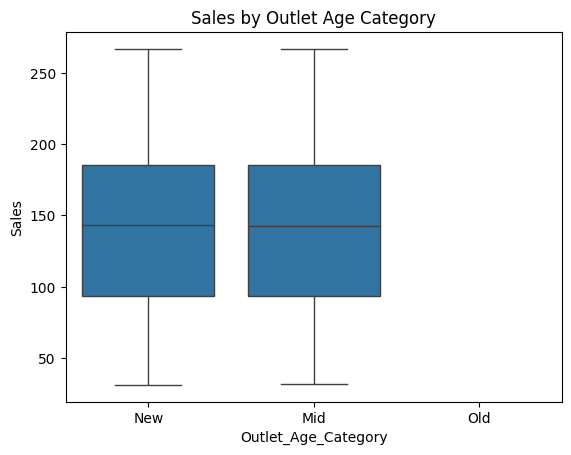

In [ ]:
df1['Outlet_Age_Category'] = pd.cut(df1['Outlet Age'], bins=[0,10,20,50],
labels=['New','Mid','Old'])
sns.boxplot(x='Outlet_Age_Category', y='Sales', data=df1)
plt.title("Sales by Outlet Age Category")
plt.show()

Case Study 7: Correlation Analysis & Multicollinearity

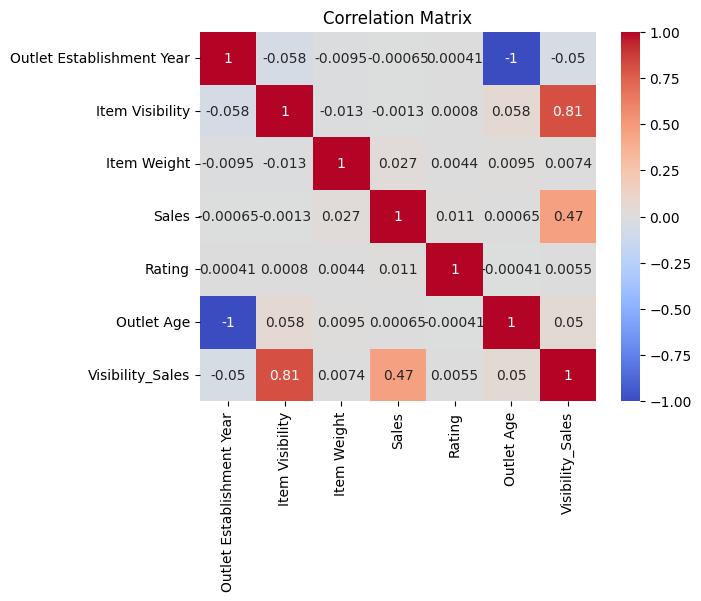

In [ ]:
#corr_matrix = df1.corr(df1['Sales'])
corr_matrix = df1.select_dtypes(include=np.number).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

Case Study 8: Clustering – Customer Segmentation by Item Sales Patterns

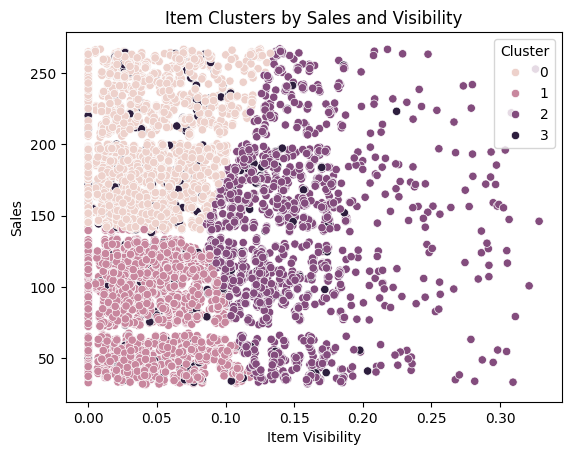

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
features = ['Item Visibility','Sales','Rating']
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1[features])
kmeans = KMeans(n_clusters=4, random_state=42)
df1['Cluster'] = kmeans.fit_predict(scaled_features)
sns.scatterplot(x='Item Visibility', y='Sales', hue='Cluster', data=df1)
plt.title("Item Clusters by Sales and Visibility")
plt.show()

Case Study 9: Actionable Insights & Recommendations

In [ ]:
high_sales_cluster = df1[df1['Cluster'] == df1['Cluster'].value_counts().idxmax()]
print(high_sales_cluster[['Item Type','Outlet Type','Sales']].groupby(['Item Type','Outlet Type']).mean())

                                      Sales
Item Type     Outlet Type                  
Baking Goods  Grocery Store      194.675529
              Supermarket Type1  192.546423
              Supermarket Type2  189.984716
              Supermarket Type3  188.607882
Breads        Grocery Store      213.409160
...                                     ...
Soft Drinks   Supermarket Type3  177.989965
Starchy Foods Grocery Store      220.401733
              Supermarket Type1  211.289713
              Supermarket Type2  211.728675
              Supermarket Type3  193.276733

[64 rows x 1 columns]


/tmp/ipython-input-2510577348.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(high_sales_cluster[['Item Type','Outlet Type','Sales']].groupby(['Item Type','Outlet Type']).mean())
